# Идеальный фильтр нижних частот

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jupyter_contrib_nbextensions
import seaborn as sns
sns.set()

In [2]:
f1, A1 = 1, 1
f2, A2 = 3, 1
f3, A3 = 8, 1
fs = 10 * np.max(np.array([f1, f2, f3]))
ts = 1 / fs
min_time = 0
max_time = 50

In [3]:
t = np.arange(min_time, max_time, ts)
N = int(np.fix(max_time * fs))
f = np.arange(len(t)) * fs / N
sin3 = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t) + A3 * np.sin(2 * np.pi * f3 * t)

In [4]:
def ILPF(f: np.array, fc, phi):
    lpfilter = np.zeros(len(f), dtype=complex)
    for i in range((int)(len(f) / 2)):
        if (f[i] <= fc):
            lpfilter[i] = np.exp(-1j * phi * f[i] / fc)
    for i in range((int)(len(f) / 2), len(f)):
        if (f[i] >= np.max(f) - fc):
            lpfilter[i] = np.exp(-1j * phi * f[i] / fc)
    return lpfilter

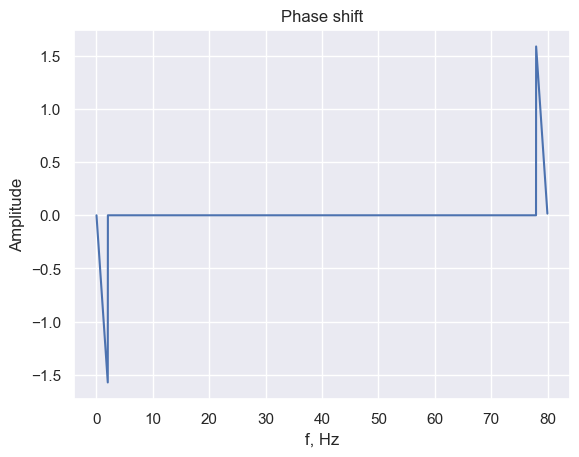

C:\Users\HUAWEI\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


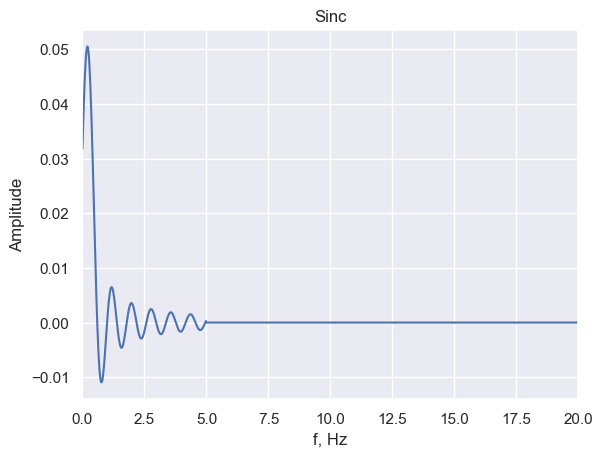

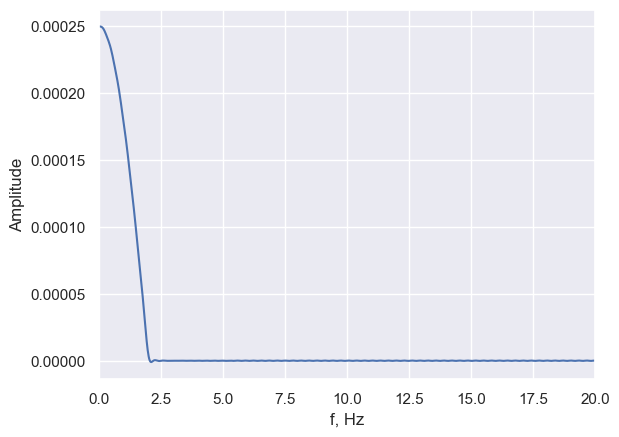

In [5]:
ilpf = ILPF(f.astype(complex), 2, np.pi/2)
fsin3 =  np.real(np.fft.ifft(ilpf * np.fft.fft(sin3)))

sinc = np.fft.ifft(ilpf)
sinc[len(f)//16:len(f)//2] = 0
sinc[len(f)//2:len(f) - len(f)//16] = 0

plt.title('Phase shift')
plt.plot(f, np.angle(ilpf))
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.show()

plt.title('Sinc')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, sinc)
plt.xlim(0,20)
plt.show()

plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.fft.fft(sinc) / len(sinc))
plt.xlim(0,20)
plt.show()

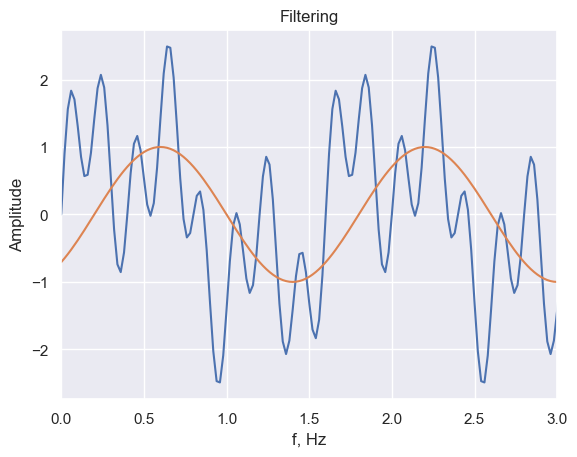

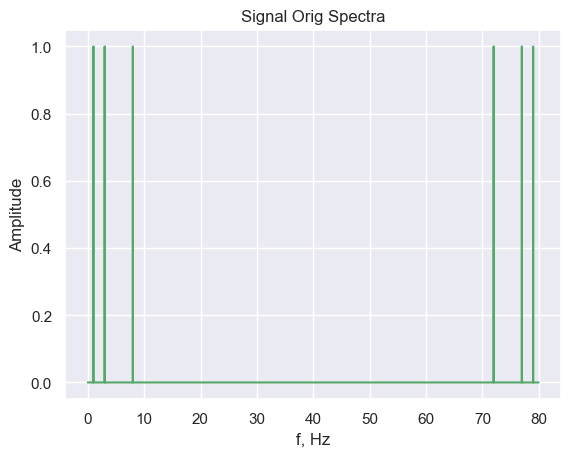

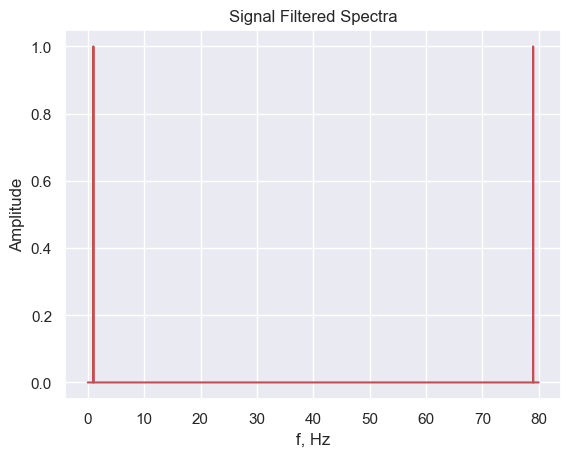

In [6]:
fsin3 =  np.real(np.fft.ifft(ilpf * np.fft.fft(sin3)))

plt.title('Filtering')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, sin3, label='Orig')
plt.plot(f, fsin3, label='Filt')
plt.xlim(0,3)
plt.show()

plt.title('Signal Orig Spectra')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.abs(np.fft.fft(sin3)) * 2/len(sin3), 'g')
plt.show()

plt.title('Signal Filtered Spectra')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.abs(np.fft.fft(fsin3)) * 2/len(fsin3), 'r')
plt.show()

# Фильтр высоких частот

In [7]:
def IHPF(f: np.array, fc, phi):
    hpfilter = np.zeros(len(f), dtype=complex)
    for i in range((int)(len(f) / 2)):
        if (f[i] >= fc):
            hpfilter[i] = np.exp(-1j * phi * f[i] / fc)
    for i in range((int)(len(f) / 2), len(f)):
        if (f[i] <= np.max(f) - fc):
            hpfilter[i] = np.exp(-1j * phi * f[i] / fc)
    return hpfilter

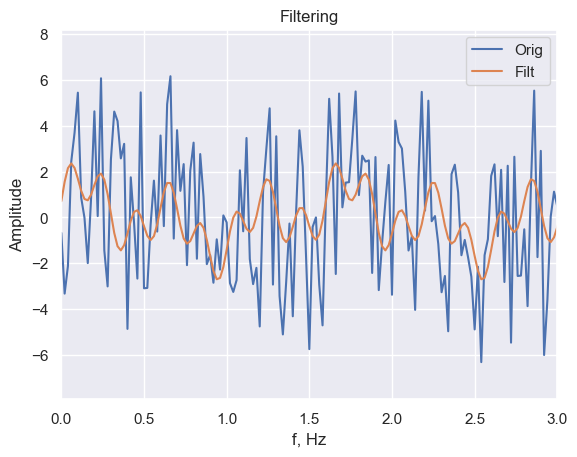

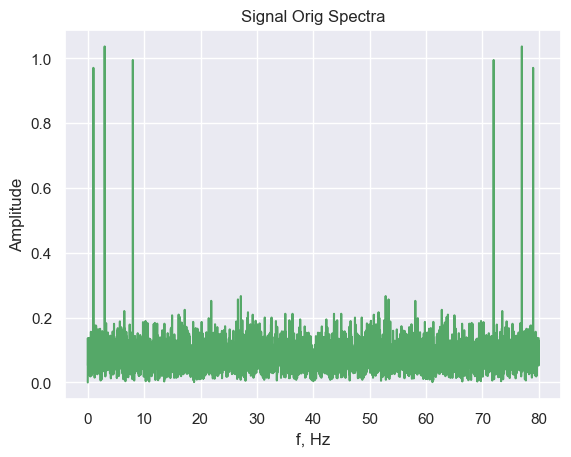

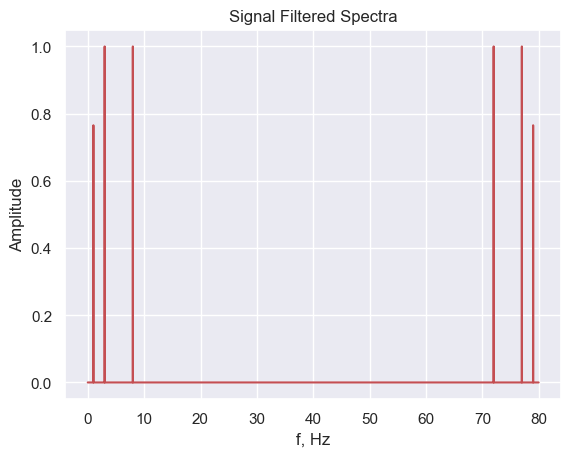

In [8]:
noise = 10 * np.random.sample(len(sin3))
noised_signal = sin3 + noise - np.mean(sin3 + noise)
fsin3 =  np.real(sin3 - np.fft.ifft(ilpf * np.fft.fft(sin3)))

plt.title('Filtering')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, noised_signal, label='Orig')
plt.plot(f, fsin3, label='Filt')
plt.legend(loc='best')
plt.xlim(0,3)
plt.show()

plt.title('Signal Orig Spectra')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.abs(np.fft.fft(noised_signal)) * 2/len(noised_signal), 'g')
plt.show()

plt.title('Signal Filtered Spectra')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.abs(np.fft.fft(fsin3)) * 2/len(fsin3), 'r')
plt.show()

# Полосовой фильтр

In [9]:
def BPF2(f: np.array, fc1, fc2):
    bandpass_filter = np.zeros(len(f)//2, dtype=complex)
    for i in range((int)(len(f) / 2)):
        if (f[i] >= fc1 and f[i] <= fc2):
            bandpass_filter[i] = np.exp(-2j * np.pi * f[i])
    return np.concatenate((bandpass_filter[::], bandpass_filter[::-1]), dtype=complex)

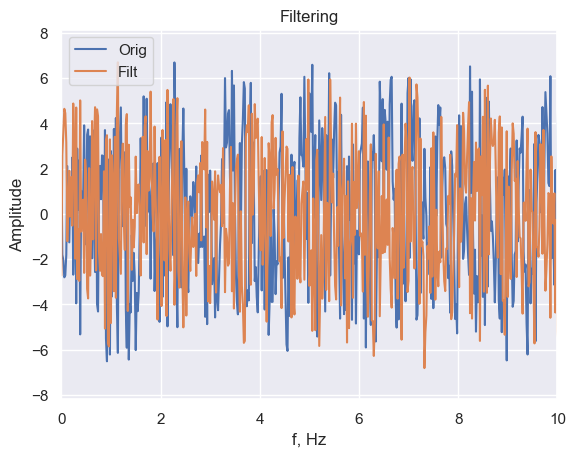

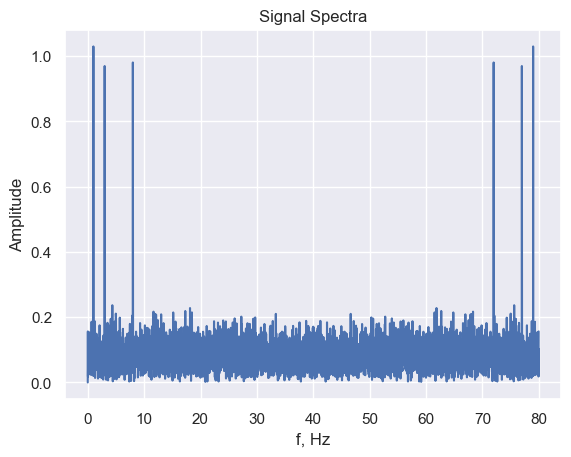

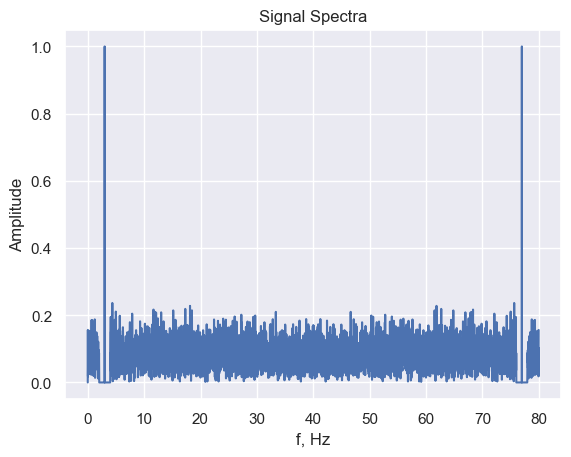

In [10]:
ilpf = ILPF(f.astype(complex), 2, 0)
ihpf = IHPF(f.astype(complex), 4, 0)
noise = 10 * np.random.sample(len(sin3))
noised_signal = sin3 + noise - np.mean(sin3 + noise)
rpf = ilpf + ihpf
fsin3 =  np.real(sin3 - np.fft.ifft(rpf * np.fft.fft(noised_signal)))

plt.title('Filtering')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, noised_signal, label='Orig')
plt.plot(f, fsin3, label='Filt')
plt.legend(loc='best')
plt.xlim(0,10)
plt.show()

plt.title('Signal Spectra')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.abs(np.fft.fft(noised_signal)) * 2/len(noised_signal))
plt.show()

plt.title('Signal Spectra')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.abs(np.fft.fft(fsin3)) * 2/len(fsin3))
plt.show()

# Фильтр режекторный

In [11]:
def rpf(f: np.array, fc1, fc2):
    rejector_filter = np.zeros(len(f)//2, dtype=complex)
    for i in range((int)(len(f) / 2)):
        if (f[i] >= fc1 and f[i] <= fc2):
            0
        else:
            rejector_filter[i] = np.exp(-2j * np.pi * f[i])
    return np.concatenate((rejector_filter[::], rejector_filter[::-1]), dtype=complex)

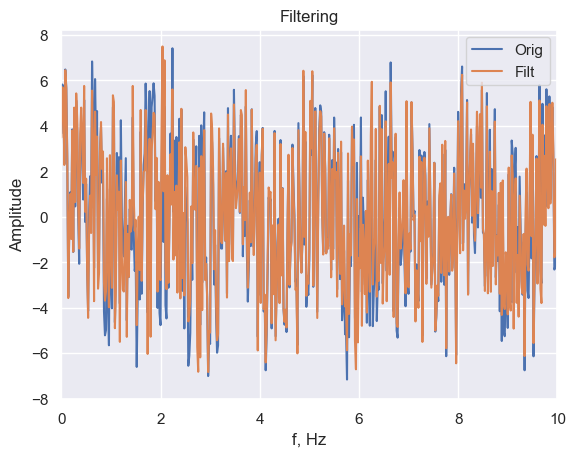

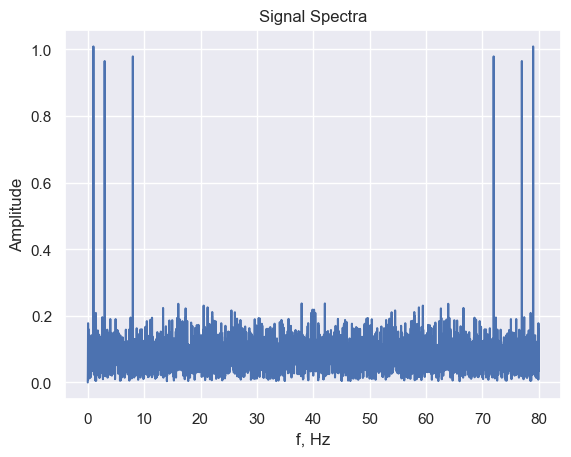

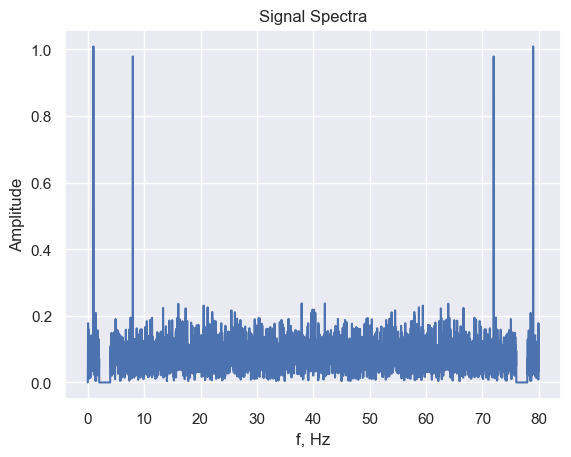

In [12]:
ilpf = ILPF(f.astype(complex), 2, 0)
ihpf = IHPF(f.astype(complex), 4, 0)
noise = 10 * np.random.sample(len(sin3))
noised_signal = sin3 + noise - np.mean(sin3 + noise)
bpf = ilpf + ihpf
fsin3 =  np.real(np.fft.ifft(bpf * np.fft.fft(noised_signal)))

plt.title('Filtering')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, noised_signal, label='Orig')
plt.plot(f, fsin3, label='Filt')
plt.legend(loc='best')
plt.xlim(0,10)
plt.show()

plt.title('Signal Spectra')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.abs(np.fft.fft(noised_signal)) * 2/len(noised_signal))
plt.show()

plt.title('Signal Spectra')
plt.xlabel('f, Hz')
plt.ylabel('Amplitude')
plt.plot(f, np.abs(np.fft.fft(fsin3)) * 2/len(fsin3))
plt.show()